In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis

In [2]:
data = pd.read_csv('./train.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
data.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


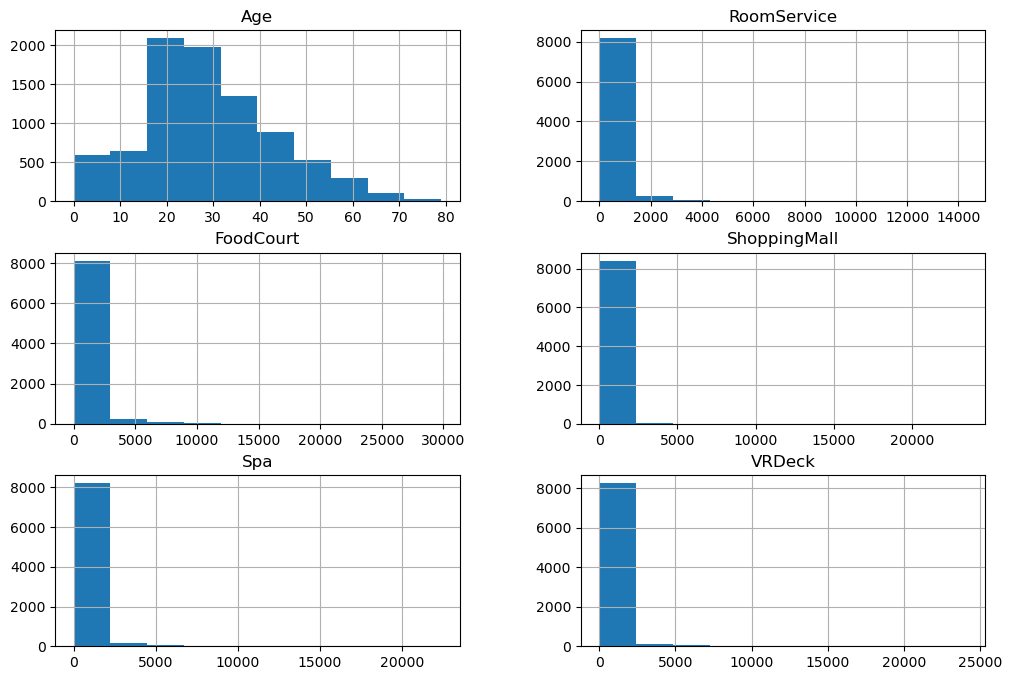

In [5]:
data.hist(figsize = (12, 8));

In [6]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
print(data["Transported"].value_counts())

Transported
True     4378
False    4315
Name: count, dtype: int64


## Some general facts
The Pasenger Id, the names and the passenger IDS serve no purpose. I also have my doubts regarding the cabin, so keeping that aside too for the time being.

# Find and deal with missing values

In [8]:
from sklearn.model_selection import train_test_split

X = data.drop("Transported", axis = 1)
y = data["Transported"] 

In [9]:
print("null counts of all the columns.")
print(X.isnull().sum())
print("------------------------------------------------------------")
print("types of all the columns.")
print(X.dtypes)

null counts of all the columns.
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64
------------------------------------------------------------
types of all the columns.
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


In [10]:
print("Rows with NaN:            ", X.isna().any(axis=1).sum())
print("Total rows:               ", X.count().max())
print(
    "Missing value percentage: ",
    int((X.isna().any(axis=1).sum() / X.count().max()) * 100),
    "%",
)

Rows with NaN:             2087
Total rows:                8693
Missing value percentage:  24 %


In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")

cols = X.columns

X = pd.DataFrame(imputer.fit_transform(X), columns=cols)

In [12]:
print("Rows with NaN:            ", X.isna().any(axis=1).sum())
print("Total rows:               ", X.count().max())
print(
    "Missing value percentage: ",
    int((X.isna().any(axis=1).sum() / X.count().max()) * 100),
    "%",
)

Rows with NaN:             0
Total rows:                8693
Missing value percentage:  0 %


# Data Pre-processing Pipeline
---
1. Some features like Name are not useful in prediction, so I drop it.
2. One Hot Encode some columns.
3. Bin the passengers based on them using or not using different services.
4. Bin the passengers based on cabin side.


In [13]:
from sklearn.base import BaseEstimator, TransformerMixin

# Step 1
class dropFeatures(BaseEstimator, TransformerMixin):
   
   def __init__(self, cols) -> None:
      self.cols = cols

   def fit(self, X, y = None):
      return self

   def transform(self, X):
      return X.drop(self.cols, axis = 1)

# Step 2
class OneHotEncode(BaseEstimator, TransformerMixin):
   
   def __init__(self, cols) -> None:
      self.cols = cols

   def fit(self, X, y = None):
      return self

   def transform(self, X):
      return pd.get_dummies(data = X, columns = self.cols)

# Step 3
class BinUsage(BaseEstimator, TransformerMixin):
   
   def __init__(self, cols) -> None:
      self.cols = cols

   def fit(self, X, y = None):
      return self

   def transform(self, X):
      X = X.copy()

      for col in self.cols:
         X[col] = X[col] > 0
         
      return X

# Step 4
class BinCabinSide(BaseEstimator, TransformerMixin):
   
   def fit(self, X, y = None):
      return self

   def transform(self, X):
      X = X.copy()

      Cabins = pd.DataFrame(X['Cabin'])
      Cabins['Side'] = Cabins['Cabin'].str[-1]
      Cabins['Side'] = Cabins['Side'] == "P"
      Cabins.drop('Cabin', axis = 1, inplace=True)
      X.drop('Cabin', axis = 1, inplace=True)


      X = X.join(Cabins)

      return X

In [14]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('drop_features', dropFeatures(cols = ['Name', 'PassengerId'])),
    ('one_hot_encode', OneHotEncode(cols = ['HomePlanet', 'Destination'])),
    # ('bin_usage', BinUsage(cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])),
    ('bin_cabin_side', BinCabinSide())
])

X = pipeline.fit_transform(X)

In [15]:
X.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,True,True
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,False,False,False,False,True,False
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,True,False,False,False,True,False
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,True,False,False,False,True,False
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,False,False,False,False,True,False


<Axes: >

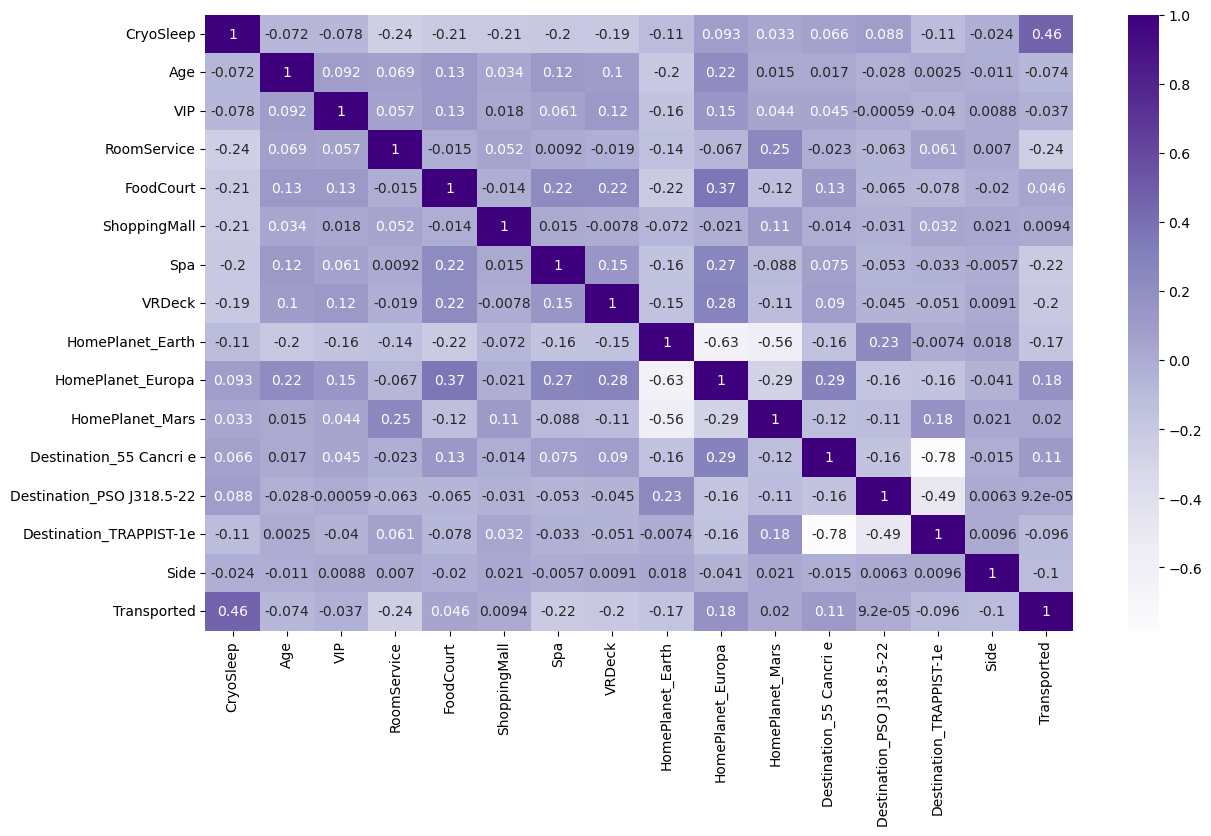

In [16]:
plt.figure(figsize=(14, 8))
sns.heatmap(X.join(y).corr(), annot = True, cmap = "Purples")

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   CryoSleep                  8693 non-null   object
 1   Age                        8693 non-null   object
 2   VIP                        8693 non-null   object
 3   RoomService                8693 non-null   object
 4   FoodCourt                  8693 non-null   object
 5   ShoppingMall               8693 non-null   object
 6   Spa                        8693 non-null   object
 7   VRDeck                     8693 non-null   object
 8   HomePlanet_Earth           8693 non-null   bool  
 9   HomePlanet_Europa          8693 non-null   bool  
 10  HomePlanet_Mars            8693 non-null   bool  
 11  Destination_55 Cancri e    8693 non-null   bool  
 12  Destination_PSO J318.5-22  8693 non-null   bool  
 13  Destination_TRAPPIST-1e    8693 non-null   bool  
 14  Side    

In [18]:
X.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,True,True
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,False,False,False,False,True,False
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,True,False,False,False,True,False
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,True,False,False,False,True,False
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,False,False,False,False,True,False


# Logestic Regreession

In [19]:
from sklearn.linear_model import LogisticRegression

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.15, random_state = 64, shuffle = True)

In [20]:
model = LogisticRegression(max_iter=5000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [21]:
model.score(X_val, y_val)

0.7960122699386503

# Hyperparameter tuning

In [22]:
from sklearn.model_selection import GridSearchCV

paramGrid = [
    {
        "penalty": ["l1", "l2", "elasticnet"],
        "solver": ["saga", "liblinear", "lbfgs", "newton-cg", "newton-cholesky", "sag"],
        "warm_start" :  [True, False],
        "l1_ratio" : [0.2, 0.4, 0.6, 0.8]
    }
]

hptm = LogisticRegression( max_iter = 5000)

gsCv = GridSearchCV(hptm,paramGrid,  cv = 3, scoring = "precision", return_train_score = True, verbose = 3)

gsCv.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 1/3] END l1_ratio=0.2, penalty=l1, solver=saga, warm_start=True;, score=(train=0.729, test=0.725) total time=   2.2s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 2/3] END l1_ratio=0.2, penalty=l1, solver=saga, warm_start=True;, score=(train=0.729, test=0.716) total time=   1.9s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 3/3] END l1_ratio=0.2, penalty=l1, solver=saga, warm_start=True;, score=(train=0.721, test=0.735) total time=   2.2s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 1/3] END l1_ratio=0.2, penalty=l1, solver=saga, warm_start=False;, score=(train=0.729, test=0.725) total time=   2.2s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 2/3] END l1_ratio=0.2, penalty=l1, solver=saga, warm_start=False;, score=(train=0.729, test=0.716) total time=   2.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 3/3] END l1_ratio=0.2, penalty=l1, solver=saga, warm_start=False;, score=(train=0.721, test=0.735) total time=   2.2s
[CV 1/3] END l1_ratio=0.2, penalty=l1, solver=liblinear, warm_start=True;, score=(train=0.782, test=0.779) total time=   0.0s
[CV 2/3] END l1_ratio=0.2, penalty=l1, solver=liblinear, warm_start=True;, score=(train=0.791, test=0.772) total time=   0.0s
[CV 3/3] END l1_ratio=0.2, penalty=l1, solver=liblinear, warm_start=True;, score=(train=0.777, test=0.796) total time=   0.0s
[CV 1/3] END l1_ratio=0.2, penalty=l1, solver=liblinear, warm_start=False;, score=(train=0.782, test=0.779) total time=   0.0s
[CV 2/3] END l1_ratio=0.2, penalty=l1, solver=liblinear, warm_start=False;, score=(train=0.791, test=0.772) total time=   0.0s
[CV 3/3] END l1_ratio=0.2, penalty=l1, solver=liblinear, warm_start=False;, score=(train=0.777, test=0.796) total time=   0.0s
[CV 1/3] END l1_ratio=0.2, penalty=l1, solver=lbfgs, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[

/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when pena

[CV 1/3] END l1_ratio=0.2, penalty=l1, solver=sag, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END l1_ratio=0.2, penalty=l1, solver=sag, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END l1_ratio=0.2, penalty=l1, solver=sag, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/3] END l1_ratio=0.2, penalty=l2, solver=saga, warm_start=True;, score=(train=0.729, test=0.725) total time=   1.8s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/3] END l1_ratio=0.2, penalty=l2, solver=saga, warm_start=True;, score=(train=0.729, test=0.716) total time=   1.6s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.2, penalty=l2, solver=saga, warm_start=True;, score=(train=0.721, test=0.735) total time=   1.8s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/3] END l1_ratio=0.2, penalty=l2, solver=saga, warm_start=False;, score=(train=0.729, test=0.725) total time=   1.9s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/3] END l1_ratio=0.2, penalty=l2, solver=saga, warm_start=False;, score=(train=0.729, test=0.716) total time=   1.6s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.2, penalty=l2, solver=saga, warm_start=False;, score=(train=0.721, test=0.735) total time=   1.9s
[CV 1/3] END l1_ratio=0.2, penalty=l2, solver=liblinear, warm_start=True;, score=(train=0.781, test=0.778) total time=   0.0s
[CV 2/3] END l1_ratio=0.2, penalty=l2, solver=liblinear, warm_start=True;, score=(train=0.791, test=0.777) total time=   0.0s
[CV 3/3] END l1_ratio=0.2, penalty=l2, solver=liblinear, warm_start=True;, score=(train=0.775, test=0.794) total time=   0.0s
[CV 1/3] END l1_ratio=0.2, penalty=l2, solver=liblinear, warm_start=False;, score=(train=0.781, test=0.778) total time=   0.0s
[CV 2/3] END l1_ratio=0.2, penalty=l2, solver=liblinear, warm_start=False;, score=(train=0.791, test=0.777) total time=   0.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when pena

[CV 3/3] END l1_ratio=0.2, penalty=l2, solver=liblinear, warm_start=False;, score=(train=0.775, test=0.794) total time=   0.0s
[CV 1/3] END l1_ratio=0.2, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.781, test=0.779) total time=   0.1s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/3] END l1_ratio=0.2, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.791, test=0.774) total time=   0.1s
[CV 3/3] END l1_ratio=0.2, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.777, test=0.797) total time=   0.1s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/3] END l1_ratio=0.2, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.781, test=0.779) total time=   0.1s
[CV 2/3] END l1_ratio=0.2, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.791, test=0.774) total time=   0.1s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.2, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.777, test=0.797) total time=   0.1s
[CV 1/3] END l1_ratio=0.2, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.781, test=0.777) total time=   0.1s
[CV 2/3] END l1_ratio=0.2, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.789, test=0.770) total time=   0.1s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.2, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.777, test=0.792) total time=   0.1s
[CV 1/3] END l1_ratio=0.2, penalty=l2, solver=newton-cg, warm_start=False;, score=(train=0.781, test=0.777) total time=   0.1s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/3] END l1_ratio=0.2, penalty=l2, solver=newton-cg, warm_start=False;, score=(train=0.789, test=0.770) total time=   0.1s
[CV 3/3] END l1_ratio=0.2, penalty=l2, solver=newton-cg, warm_start=False;, score=(train=0.777, test=0.792) total time=   0.1s
[CV 1/3] END l1_ratio=0.2, penalty=l2, solver=newton-cholesky, warm_start=True;, score=(train=0.781, test=0.777) total time=   0.0s
[CV 2/3] END l1_ratio=0.2, penalty=l2, solver=newton-cholesky, warm_start=True;, score=(train=0.789, test=0.770) total time=   0.0s
[CV 3/3] END l1_ratio=0.2, penalty=l2, solver=newton-cholesky, warm_start=True;, score=(train=0.777, test=0.792) total time=   0.0s
[CV 1/3] END l1_ratio=0.2, penalty=l2, solver=newton-cholesky, warm_start=False;, score=(train=0.781, test=0.777) total time=   0.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when pena

[CV 2/3] END l1_ratio=0.2, penalty=l2, solver=newton-cholesky, warm_start=False;, score=(train=0.789, test=0.770) total time=   0.0s
[CV 3/3] END l1_ratio=0.2, penalty=l2, solver=newton-cholesky, warm_start=False;, score=(train=0.777, test=0.792) total time=   0.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/3] END l1_ratio=0.2, penalty=l2, solver=sag, warm_start=True;, score=(train=0.727, test=0.725) total time=   1.1s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/3] END l1_ratio=0.2, penalty=l2, solver=sag, warm_start=True;, score=(train=0.728, test=0.716) total time=   1.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.2, penalty=l2, solver=sag, warm_start=True;, score=(train=0.721, test=0.734) total time=   1.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/3] END l1_ratio=0.2, penalty=l2, solver=sag, warm_start=False;, score=(train=0.727, test=0.725) total time=   1.1s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/3] END l1_ratio=0.2, penalty=l2, solver=sag, warm_start=False;, score=(train=0.728, test=0.716) total time=   0.9s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.2, penalty=l2, solver=sag, warm_start=False;, score=(train=0.721, test=0.734) total time=   1.1s
[CV 1/3] END l1_ratio=0.2, penalty=elasticnet, solver=saga, warm_start=True;, score=(train=0.729, test=0.725) total time=   2.3s
[CV 2/3] END l1_ratio=0.2, penalty=elasticnet, solver=saga, warm_start=True;, score=(train=0.729, test=0.716) total time=   2.0s
[CV 3/3] END l1_ratio=0.2, penalty=elasticnet, solver=saga, warm_start=True;, score=(train=0.721, test=0.735) total time=   2.2s
[CV 1/3] END l1_ratio=0.2, penalty=elasticnet, solver=saga, warm_start=False;, score=(train=0.729, test=0.725) total time=   2.3s
[CV 2/3] END l1_ratio=0.2, penalty=elasticnet, solver=saga, warm_start=False;, score=(train=0.729, test=0.716) total time=   2.1s
[CV 3/3] END l1_ratio=0.2, penalty=elasticnet, solver=saga, warm_start=False;, score=(train=0.721, test=0.735) total time=   2.3s
[CV 1/3] END l1_ratio=0.2, penalty=elasticnet, solver=liblinear, warm_start=True;, score=(train=nan, t

/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 1/3] END l1_ratio=0.4, penalty=l1, solver=saga, warm_start=True;, score=(train=0.729, test=0.725) total time=   2.3s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 2/3] END l1_ratio=0.4, penalty=l1, solver=saga, warm_start=True;, score=(train=0.729, test=0.716) total time=   2.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 3/3] END l1_ratio=0.4, penalty=l1, solver=saga, warm_start=True;, score=(train=0.721, test=0.735) total time=   2.2s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 1/3] END l1_ratio=0.4, penalty=l1, solver=saga, warm_start=False;, score=(train=0.729, test=0.725) total time=   2.3s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 2/3] END l1_ratio=0.4, penalty=l1, solver=saga, warm_start=False;, score=(train=0.729, test=0.716) total time=   2.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 3/3] END l1_ratio=0.4, penalty=l1, solver=saga, warm_start=False;, score=(train=0.721, test=0.735) total time=   2.3s
[CV 1/3] END l1_ratio=0.4, penalty=l1, solver=liblinear, warm_start=True;, score=(train=0.782, test=0.779) total time=   0.0s
[CV 2/3] END l1_ratio=0.4, penalty=l1, solver=liblinear, warm_start=True;, score=(train=0.791, test=0.772) total time=   0.0s
[CV 3/3] END l1_ratio=0.4, penalty=l1, solver=liblinear, warm_start=True;, score=(train=0.777, test=0.796) total time=   0.0s
[CV 1/3] END l1_ratio=0.4, penalty=l1, solver=liblinear, warm_start=False;, score=(train=0.783, test=0.778) total time=   0.0s
[CV 2/3] END l1_ratio=0.4, penalty=l1, solver=liblinear, warm_start=False;, score=(train=0.791, test=0.772) total time=   0.0s
[CV 3/3] END l1_ratio=0.4, penalty=l1, solver=liblinear, warm_start=False;, score=(train=0.777, test=0.796) total time=   0.0s
[CV 1/3] END l1_ratio=0.4, penalty=l1, solver=lbfgs, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[

/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when pena

[CV 1/3] END l1_ratio=0.4, penalty=l1, solver=newton-cholesky, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END l1_ratio=0.4, penalty=l1, solver=newton-cholesky, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END l1_ratio=0.4, penalty=l1, solver=newton-cholesky, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END l1_ratio=0.4, penalty=l1, solver=sag, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END l1_ratio=0.4, penalty=l1, solver=sag, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END l1_ratio=0.4, penalty=l1, solver=sag, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END l1_ratio=0.4, penalty=l1, solver=sag, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END l1_ratio=0.4, penalty=l1, solver=sag, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END l1_ratio=0.4, pena

/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/3] END l1_ratio=0.4, penalty=l2, solver=saga, warm_start=True;, score=(train=0.729, test=0.725) total time=   1.9s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/3] END l1_ratio=0.4, penalty=l2, solver=saga, warm_start=True;, score=(train=0.729, test=0.716) total time=   1.6s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.4, penalty=l2, solver=saga, warm_start=True;, score=(train=0.721, test=0.735) total time=   1.8s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/3] END l1_ratio=0.4, penalty=l2, solver=saga, warm_start=False;, score=(train=0.729, test=0.725) total time=   1.9s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/3] END l1_ratio=0.4, penalty=l2, solver=saga, warm_start=False;, score=(train=0.729, test=0.716) total time=   1.7s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.4, penalty=l2, solver=saga, warm_start=False;, score=(train=0.721, test=0.735) total time=   1.8s
[CV 1/3] END l1_ratio=0.4, penalty=l2, solver=liblinear, warm_start=True;, score=(train=0.781, test=0.778) total time=   0.0s
[CV 2/3] END l1_ratio=0.4, penalty=l2, solver=liblinear, warm_start=True;, score=(train=0.791, test=0.777) total time=   0.0s
[CV 3/3] END l1_ratio=0.4, penalty=l2, solver=liblinear, warm_start=True;, score=(train=0.775, test=0.794) total time=   0.0s
[CV 1/3] END l1_ratio=0.4, penalty=l2, solver=liblinear, warm_start=False;, score=(train=0.781, test=0.778) total time=   0.0s
[CV 2/3] END l1_ratio=0.4, penalty=l2, solver=liblinear, warm_start=False;, score=(train=0.791, test=0.777) total time=   0.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when pena

[CV 3/3] END l1_ratio=0.4, penalty=l2, solver=liblinear, warm_start=False;, score=(train=0.775, test=0.794) total time=   0.0s
[CV 1/3] END l1_ratio=0.4, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.781, test=0.779) total time=   0.1s
[CV 2/3] END l1_ratio=0.4, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.791, test=0.774) total time=   0.1s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.4, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.777, test=0.797) total time=   0.1s
[CV 1/3] END l1_ratio=0.4, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.781, test=0.779) total time=   0.1s
[CV 2/3] END l1_ratio=0.4, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.791, test=0.774) total time=   0.1s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.4, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.777, test=0.797) total time=   0.1s
[CV 1/3] END l1_ratio=0.4, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.781, test=0.777) total time=   0.1s
[CV 2/3] END l1_ratio=0.4, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.789, test=0.770) total time=   0.1s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.4, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.777, test=0.792) total time=   0.1s
[CV 1/3] END l1_ratio=0.4, penalty=l2, solver=newton-cg, warm_start=False;, score=(train=0.781, test=0.777) total time=   0.1s
[CV 2/3] END l1_ratio=0.4, penalty=l2, solver=newton-cg, warm_start=False;, score=(train=0.789, test=0.770) total time=   0.1s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.4, penalty=l2, solver=newton-cg, warm_start=False;, score=(train=0.777, test=0.792) total time=   0.1s
[CV 1/3] END l1_ratio=0.4, penalty=l2, solver=newton-cholesky, warm_start=True;, score=(train=0.781, test=0.777) total time=   0.0s
[CV 2/3] END l1_ratio=0.4, penalty=l2, solver=newton-cholesky, warm_start=True;, score=(train=0.789, test=0.770) total time=   0.0s
[CV 3/3] END l1_ratio=0.4, penalty=l2, solver=newton-cholesky, warm_start=True;, score=(train=0.777, test=0.792) total time=   0.0s
[CV 1/3] END l1_ratio=0.4, penalty=l2, solver=newton-cholesky, warm_start=False;, score=(train=0.781, test=0.777) total time=   0.0s
[CV 2/3] END l1_ratio=0.4, penalty=l2, solver=newton-cholesky, warm_start=False;, score=(train=0.789, test=0.770) total time=   0.0s
[CV 3/3] END l1_ratio=0.4, penalty=l2, solver=newton-cholesky, warm_start=False;, score=(train=0.777, test=0.792) total time=   0.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when pena

[CV 1/3] END l1_ratio=0.4, penalty=l2, solver=sag, warm_start=True;, score=(train=0.727, test=0.725) total time=   1.1s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/3] END l1_ratio=0.4, penalty=l2, solver=sag, warm_start=True;, score=(train=0.728, test=0.716) total time=   0.9s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.4, penalty=l2, solver=sag, warm_start=True;, score=(train=0.721, test=0.734) total time=   1.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/3] END l1_ratio=0.4, penalty=l2, solver=sag, warm_start=False;, score=(train=0.727, test=0.725) total time=   1.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/3] END l1_ratio=0.4, penalty=l2, solver=sag, warm_start=False;, score=(train=0.728, test=0.716) total time=   0.9s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.4, penalty=l2, solver=sag, warm_start=False;, score=(train=0.721, test=0.734) total time=   1.0s
[CV 1/3] END l1_ratio=0.4, penalty=elasticnet, solver=saga, warm_start=True;, score=(train=0.729, test=0.725) total time=   2.2s
[CV 2/3] END l1_ratio=0.4, penalty=elasticnet, solver=saga, warm_start=True;, score=(train=0.729, test=0.716) total time=   1.9s
[CV 3/3] END l1_ratio=0.4, penalty=elasticnet, solver=saga, warm_start=True;, score=(train=0.721, test=0.735) total time=   2.2s
[CV 1/3] END l1_ratio=0.4, penalty=elasticnet, solver=saga, warm_start=False;, score=(train=0.729, test=0.725) total time=   2.3s
[CV 2/3] END l1_ratio=0.4, penalty=elasticnet, solver=saga, warm_start=False;, score=(train=0.729, test=0.716) total time=   2.0s
[CV 3/3] END l1_ratio=0.4, penalty=elasticnet, solver=saga, warm_start=False;, score=(train=0.721, test=0.735) total time=   2.2s
[CV 1/3] END l1_ratio=0.4, penalty=elasticnet, solver=liblinear, warm_start=True;, score=(train=nan, t

/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 1/3] END l1_ratio=0.6, penalty=l1, solver=saga, warm_start=True;, score=(train=0.729, test=0.725) total time=   2.2s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 2/3] END l1_ratio=0.6, penalty=l1, solver=saga, warm_start=True;, score=(train=0.729, test=0.716) total time=   2.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 3/3] END l1_ratio=0.6, penalty=l1, solver=saga, warm_start=True;, score=(train=0.721, test=0.735) total time=   2.2s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 1/3] END l1_ratio=0.6, penalty=l1, solver=saga, warm_start=False;, score=(train=0.729, test=0.725) total time=   2.2s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 2/3] END l1_ratio=0.6, penalty=l1, solver=saga, warm_start=False;, score=(train=0.729, test=0.716) total time=   1.9s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 3/3] END l1_ratio=0.6, penalty=l1, solver=saga, warm_start=False;, score=(train=0.721, test=0.735) total time=   2.1s
[CV 1/3] END l1_ratio=0.6, penalty=l1, solver=liblinear, warm_start=True;, score=(train=0.782, test=0.778) total time=   0.0s
[CV 2/3] END l1_ratio=0.6, penalty=l1, solver=liblinear, warm_start=True;, score=(train=0.791, test=0.772) total time=   0.0s
[CV 3/3] END l1_ratio=0.6, penalty=l1, solver=liblinear, warm_start=True;, score=(train=0.777, test=0.796) total time=   0.0s
[CV 1/3] END l1_ratio=0.6, penalty=l1, solver=liblinear, warm_start=False;, score=(train=0.782, test=0.778) total time=   0.0s
[CV 2/3] END l1_ratio=0.6, penalty=l1, solver=liblinear, warm_start=False;, score=(train=0.790, test=0.772) total time=   0.0s
[CV 3/3] END l1_ratio=0.6, penalty=l1, solver=liblinear, warm_start=False;, score=(train=0.777, test=0.796) total time=   0.0s
[CV 1/3] END l1_ratio=0.6, penalty=l1, solver=lbfgs, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[

/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when pena

[CV 1/3] END l1_ratio=0.6, penalty=l2, solver=saga, warm_start=True;, score=(train=0.729, test=0.725) total time=   1.8s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/3] END l1_ratio=0.6, penalty=l2, solver=saga, warm_start=True;, score=(train=0.729, test=0.716) total time=   1.6s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.6, penalty=l2, solver=saga, warm_start=True;, score=(train=0.721, test=0.735) total time=   1.7s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/3] END l1_ratio=0.6, penalty=l2, solver=saga, warm_start=False;, score=(train=0.729, test=0.725) total time=   1.8s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/3] END l1_ratio=0.6, penalty=l2, solver=saga, warm_start=False;, score=(train=0.729, test=0.716) total time=   1.6s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.6, penalty=l2, solver=saga, warm_start=False;, score=(train=0.721, test=0.735) total time=   1.7s
[CV 1/3] END l1_ratio=0.6, penalty=l2, solver=liblinear, warm_start=True;, score=(train=0.781, test=0.778) total time=   0.0s
[CV 2/3] END l1_ratio=0.6, penalty=l2, solver=liblinear, warm_start=True;, score=(train=0.791, test=0.777) total time=   0.0s
[CV 3/3] END l1_ratio=0.6, penalty=l2, solver=liblinear, warm_start=True;, score=(train=0.775, test=0.794) total time=   0.0s
[CV 1/3] END l1_ratio=0.6, penalty=l2, solver=liblinear, warm_start=False;, score=(train=0.781, test=0.778) total time=   0.0s
[CV 2/3] END l1_ratio=0.6, penalty=l2, solver=liblinear, warm_start=False;, score=(train=0.791, test=0.777) total time=   0.0s
[CV 3/3] END l1_ratio=0.6, penalty=l2, solver=liblinear, warm_start=False;, score=(train=0.775, test=0.794) total time=   0.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when pena

[CV 1/3] END l1_ratio=0.6, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.781, test=0.779) total time=   0.1s
[CV 2/3] END l1_ratio=0.6, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.791, test=0.774) total time=   0.1s
[CV 3/3] END l1_ratio=0.6, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.777, test=0.797) total time=   0.1s
[CV 1/3] END l1_ratio=0.6, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.781, test=0.779) total time=   0.1s
[CV 2/3] END l1_ratio=0.6, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.791, test=0.774) total time=   0.1s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.6, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.777, test=0.797) total time=   0.1s
[CV 1/3] END l1_ratio=0.6, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.781, test=0.777) total time=   0.1s
[CV 2/3] END l1_ratio=0.6, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.789, test=0.770) total time=   0.1s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.6, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.777, test=0.792) total time=   0.1s
[CV 1/3] END l1_ratio=0.6, penalty=l2, solver=newton-cg, warm_start=False;, score=(train=0.781, test=0.777) total time=   0.1s
[CV 2/3] END l1_ratio=0.6, penalty=l2, solver=newton-cg, warm_start=False;, score=(train=0.789, test=0.770) total time=   0.1s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.6, penalty=l2, solver=newton-cg, warm_start=False;, score=(train=0.777, test=0.792) total time=   0.1s
[CV 1/3] END l1_ratio=0.6, penalty=l2, solver=newton-cholesky, warm_start=True;, score=(train=0.781, test=0.777) total time=   0.0s
[CV 2/3] END l1_ratio=0.6, penalty=l2, solver=newton-cholesky, warm_start=True;, score=(train=0.789, test=0.770) total time=   0.0s
[CV 3/3] END l1_ratio=0.6, penalty=l2, solver=newton-cholesky, warm_start=True;, score=(train=0.777, test=0.792) total time=   0.0s
[CV 1/3] END l1_ratio=0.6, penalty=l2, solver=newton-cholesky, warm_start=False;, score=(train=0.781, test=0.777) total time=   0.0s
[CV 2/3] END l1_ratio=0.6, penalty=l2, solver=newton-cholesky, warm_start=False;, score=(train=0.789, test=0.770) total time=   0.0s
[CV 3/3] END l1_ratio=0.6, penalty=l2, solver=newton-cholesky, warm_start=False;, score=(train=0.777, test=0.792) total time=   0.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when pena

[CV 1/3] END l1_ratio=0.6, penalty=l2, solver=sag, warm_start=True;, score=(train=0.727, test=0.725) total time=   1.1s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/3] END l1_ratio=0.6, penalty=l2, solver=sag, warm_start=True;, score=(train=0.728, test=0.716) total time=   0.9s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.6, penalty=l2, solver=sag, warm_start=True;, score=(train=0.721, test=0.734) total time=   1.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/3] END l1_ratio=0.6, penalty=l2, solver=sag, warm_start=False;, score=(train=0.727, test=0.725) total time=   1.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/3] END l1_ratio=0.6, penalty=l2, solver=sag, warm_start=False;, score=(train=0.728, test=0.716) total time=   0.9s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.6, penalty=l2, solver=sag, warm_start=False;, score=(train=0.721, test=0.734) total time=   1.1s
[CV 1/3] END l1_ratio=0.6, penalty=elasticnet, solver=saga, warm_start=True;, score=(train=0.729, test=0.725) total time=   2.5s
[CV 2/3] END l1_ratio=0.6, penalty=elasticnet, solver=saga, warm_start=True;, score=(train=0.729, test=0.716) total time=   2.2s
[CV 3/3] END l1_ratio=0.6, penalty=elasticnet, solver=saga, warm_start=True;, score=(train=0.721, test=0.735) total time=   2.3s
[CV 1/3] END l1_ratio=0.6, penalty=elasticnet, solver=saga, warm_start=False;, score=(train=0.729, test=0.725) total time=   2.5s
[CV 2/3] END l1_ratio=0.6, penalty=elasticnet, solver=saga, warm_start=False;, score=(train=0.729, test=0.716) total time=   2.1s
[CV 3/3] END l1_ratio=0.6, penalty=elasticnet, solver=saga, warm_start=False;, score=(train=0.721, test=0.735) total time=   2.1s
[CV 1/3] END l1_ratio=0.6, penalty=elasticnet, solver=liblinear, warm_start=True;, score=(train=nan, t

/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 1/3] END l1_ratio=0.8, penalty=l1, solver=saga, warm_start=True;, score=(train=0.729, test=0.725) total time=   2.2s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 2/3] END l1_ratio=0.8, penalty=l1, solver=saga, warm_start=True;, score=(train=0.729, test=0.716) total time=   2.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 3/3] END l1_ratio=0.8, penalty=l1, solver=saga, warm_start=True;, score=(train=0.721, test=0.735) total time=   2.2s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 1/3] END l1_ratio=0.8, penalty=l1, solver=saga, warm_start=False;, score=(train=0.729, test=0.725) total time=   2.2s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 2/3] END l1_ratio=0.8, penalty=l1, solver=saga, warm_start=False;, score=(train=0.729, test=0.716) total time=   1.9s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV 3/3] END l1_ratio=0.8, penalty=l1, solver=saga, warm_start=False;, score=(train=0.721, test=0.735) total time=   2.2s
[CV 1/3] END l1_ratio=0.8, penalty=l1, solver=liblinear, warm_start=True;, score=(train=0.782, test=0.778) total time=   0.0s
[CV 2/3] END l1_ratio=0.8, penalty=l1, solver=liblinear, warm_start=True;, score=(train=0.791, test=0.772) total time=   0.0s
[CV 3/3] END l1_ratio=0.8, penalty=l1, solver=liblinear, warm_start=True;, score=(train=0.777, test=0.796) total time=   0.0s
[CV 1/3] END l1_ratio=0.8, penalty=l1, solver=liblinear, warm_start=False;, score=(train=0.783, test=0.779) total time=   0.0s
[CV 2/3] END l1_ratio=0.8, penalty=l1, solver=liblinear, warm_start=False;, score=(train=0.791, test=0.772) total time=   0.0s
[CV 3/3] END l1_ratio=0.8, penalty=l1, solver=liblinear, warm_start=False;, score=(train=0.777, test=0.796) total time=   0.0s
[CV 1/3] END l1_ratio=0.8, penalty=l1, solver=lbfgs, warm_start=True;, score=(train=nan, test=nan) total time=   0.0s
[

/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when pena

[CV 3/3] END l1_ratio=0.8, penalty=l1, solver=sag, warm_start=False;, score=(train=nan, test=nan) total time=   0.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/3] END l1_ratio=0.8, penalty=l2, solver=saga, warm_start=True;, score=(train=0.729, test=0.725) total time=   1.9s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/3] END l1_ratio=0.8, penalty=l2, solver=saga, warm_start=True;, score=(train=0.729, test=0.716) total time=   1.6s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.8, penalty=l2, solver=saga, warm_start=True;, score=(train=0.721, test=0.735) total time=   1.8s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/3] END l1_ratio=0.8, penalty=l2, solver=saga, warm_start=False;, score=(train=0.729, test=0.725) total time=   1.9s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/3] END l1_ratio=0.8, penalty=l2, solver=saga, warm_start=False;, score=(train=0.729, test=0.716) total time=   1.6s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.8, penalty=l2, solver=saga, warm_start=False;, score=(train=0.721, test=0.735) total time=   1.8s
[CV 1/3] END l1_ratio=0.8, penalty=l2, solver=liblinear, warm_start=True;, score=(train=0.781, test=0.778) total time=   0.0s
[CV 2/3] END l1_ratio=0.8, penalty=l2, solver=liblinear, warm_start=True;, score=(train=0.791, test=0.777) total time=   0.0s
[CV 3/3] END l1_ratio=0.8, penalty=l2, solver=liblinear, warm_start=True;, score=(train=0.775, test=0.794) total time=   0.0s
[CV 1/3] END l1_ratio=0.8, penalty=l2, solver=liblinear, warm_start=False;, score=(train=0.781, test=0.778) total time=   0.0s
[CV 2/3] END l1_ratio=0.8, penalty=l2, solver=liblinear, warm_start=False;, score=(train=0.791, test=0.777) total time=   0.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when pena

[CV 3/3] END l1_ratio=0.8, penalty=l2, solver=liblinear, warm_start=False;, score=(train=0.775, test=0.794) total time=   0.0s
[CV 1/3] END l1_ratio=0.8, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.781, test=0.779) total time=   0.1s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/3] END l1_ratio=0.8, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.791, test=0.774) total time=   0.1s
[CV 3/3] END l1_ratio=0.8, penalty=l2, solver=lbfgs, warm_start=True;, score=(train=0.777, test=0.797) total time=   0.1s
[CV 1/3] END l1_ratio=0.8, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.781, test=0.779) total time=   0.1s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/3] END l1_ratio=0.8, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.791, test=0.774) total time=   0.1s
[CV 3/3] END l1_ratio=0.8, penalty=l2, solver=lbfgs, warm_start=False;, score=(train=0.777, test=0.797) total time=   0.1s
[CV 1/3] END l1_ratio=0.8, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.781, test=0.777) total time=   0.1s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/3] END l1_ratio=0.8, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.789, test=0.770) total time=   0.1s
[CV 3/3] END l1_ratio=0.8, penalty=l2, solver=newton-cg, warm_start=True;, score=(train=0.777, test=0.792) total time=   0.1s
[CV 1/3] END l1_ratio=0.8, penalty=l2, solver=newton-cg, warm_start=False;, score=(train=0.781, test=0.777) total time=   0.1s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/3] END l1_ratio=0.8, penalty=l2, solver=newton-cg, warm_start=False;, score=(train=0.789, test=0.770) total time=   0.1s
[CV 3/3] END l1_ratio=0.8, penalty=l2, solver=newton-cg, warm_start=False;, score=(train=0.777, test=0.792) total time=   0.1s
[CV 1/3] END l1_ratio=0.8, penalty=l2, solver=newton-cholesky, warm_start=True;, score=(train=0.781, test=0.777) total time=   0.0s
[CV 2/3] END l1_ratio=0.8, penalty=l2, solver=newton-cholesky, warm_start=True;, score=(train=0.789, test=0.770) total time=   0.0s
[CV 3/3] END l1_ratio=0.8, penalty=l2, solver=newton-cholesky, warm_start=True;, score=(train=0.777, test=0.792) total time=   0.0s
[CV 1/3] END l1_ratio=0.8, penalty=l2, solver=newton-cholesky, warm_start=False;, score=(train=0.781, test=0.777) total time=   0.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when pena

[CV 2/3] END l1_ratio=0.8, penalty=l2, solver=newton-cholesky, warm_start=False;, score=(train=0.789, test=0.770) total time=   0.0s
[CV 3/3] END l1_ratio=0.8, penalty=l2, solver=newton-cholesky, warm_start=False;, score=(train=0.777, test=0.792) total time=   0.1s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/3] END l1_ratio=0.8, penalty=l2, solver=sag, warm_start=True;, score=(train=0.727, test=0.725) total time=   1.1s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/3] END l1_ratio=0.8, penalty=l2, solver=sag, warm_start=True;, score=(train=0.728, test=0.716) total time=   0.8s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.8, penalty=l2, solver=sag, warm_start=True;, score=(train=0.721, test=0.734) total time=   0.9s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 1/3] END l1_ratio=0.8, penalty=l2, solver=sag, warm_start=False;, score=(train=0.727, test=0.725) total time=   1.0s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 2/3] END l1_ratio=0.8, penalty=l2, solver=sag, warm_start=False;, score=(train=0.728, test=0.716) total time=   0.9s


/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV 3/3] END l1_ratio=0.8, penalty=l2, solver=sag, warm_start=False;, score=(train=0.721, test=0.734) total time=   1.0s
[CV 1/3] END l1_ratio=0.8, penalty=elasticnet, solver=saga, warm_start=True;, score=(train=0.729, test=0.725) total time=   2.1s
[CV 2/3] END l1_ratio=0.8, penalty=elasticnet, solver=saga, warm_start=True;, score=(train=0.729, test=0.716) total time=   1.9s
[CV 3/3] END l1_ratio=0.8, penalty=elasticnet, solver=saga, warm_start=True;, score=(train=0.721, test=0.735) total time=   2.1s
[CV 1/3] END l1_ratio=0.8, penalty=elasticnet, solver=saga, warm_start=False;, score=(train=0.729, test=0.725) total time=   2.1s
[CV 2/3] END l1_ratio=0.8, penalty=elasticnet, solver=saga, warm_start=False;, score=(train=0.729, test=0.716) total time=   1.9s
[CV 3/3] END l1_ratio=0.8, penalty=elasticnet, solver=saga, warm_start=False;, score=(train=0.721, test=0.735) total time=   2.1s
[CV 1/3] END l1_ratio=0.8, penalty=elasticnet, solver=liblinear, warm_start=True;, score=(train=nan, t

/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
216 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/darshil/Programs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/da

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=5000),
             param_grid=[{'l1_ratio': [0.2, 0.4, 0.6, 0.8],
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['saga', 'liblinear', 'lbfgs', 'newton-cg',
                                     'newton-cholesky', 'sag'],
                          'warm_start': [True, False]}],
             return_train_score=True, scoring='precision', verbose=3)

In [23]:
finalClf = gsCv.best_estimator_

In [24]:
finalClf

LogisticRegression(l1_ratio=0.2, max_iter=5000, solver='liblinear',
                   warm_start=True)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

fc_pred = finalClf.predict(X_val)
print(classification_report(fc_pred, y_val))
cm = confusion_matrix(fc_pred, y_val)
print(cm)

              precision    recall  f1-score   support

       False       0.76      0.82      0.79       612
        True       0.83      0.78      0.80       692

    accuracy                           0.80      1304
   macro avg       0.80      0.80      0.80      1304
weighted avg       0.80      0.80      0.80      1304

[[499 113]
 [154 538]]


# Kaggle Submission

In [31]:
testSet = pd.read_csv("test.csv")
px_ids = testSet["PassengerId"]

testSet = pd.DataFrame(imputer.fit_transform(testSet), columns = testSet.columns)

testSet = pipeline.fit_transform(testSet)

In [32]:
y_pred = finalClf.predict(testSet)

In [43]:
result = pd.DataFrame(px_ids).join(pd.DataFrame(y_pred, columns = ["Transported"]))

In [44]:
result

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [45]:
result.to_csv("Submission.csv", index = False)